### Listing 4: polyfit 

[ 1.87814025e-02 -6.30663836e-01 -5.11778435e+01]


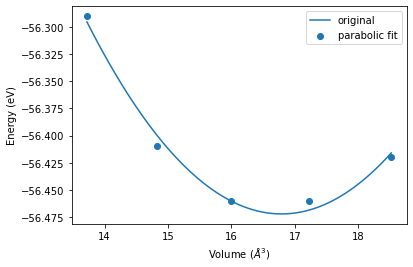

In [3]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([13.72, 14.83, 16.0, 17.23, 18.52])
e = np.array([-56.29, -56.41, -56.46, -56.46, -56.42])

# fit a parabola to the data
a = np.polyfit(v,e,2)

print(a)

plt.scatter(v,e)

# make a vector to evaluate fits on with a lot of points so it looks smooth
vfit = np.linspace(min(v),max(v),100)

# plot original data and fitted data
plt.plot(vfit, (a[0]*vfit**2 + a[1]*vfit + a[2]))
plt.legend(('original', 'parabolic fit'))
plt.xlabel("Volume ($\AA^3$)")
plt.ylabel("Energy (eV)")
plt.show()

### Listing 5: integration

14.666666666666668
4*x**3/3 + 2*x


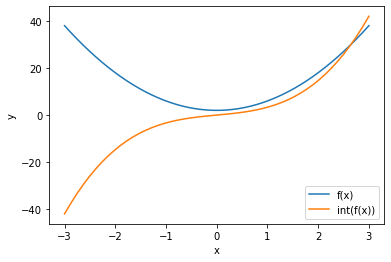

In [4]:
from scipy.integrate import quad
import sympy

# Define the function
def func(x):
    return 4*x**2 +2

# Definite integration
def int_func(a, b):
    I= quad(func, a , b)
    return I[0]

print (int_func(0, 2))
    
# Symbolic integration
def int(x):
    x = sympy.symbols('x')
    val =sympy.integrate(func(x), x)
    return val

x = sympy.symbols("x")
value = int(x)
print(value)

# Plotting

x = sympy.symbols('x')
intx=[]
for i in np.linspace(-3,3):
    intx.append(int(x).evalf(subs={x: i}))
    
x = np.linspace(-3,3)
plt.plot(x,func(x))
plt.plot(x,intx)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('f(x)', 'int(f(x))' ))
plt.show()

### Listing 6: Optimize

[2.58815864 1.23732284 0.44081796] [[ 0.01827589  0.00658485 -0.00116551]
 [ 0.00658485  0.02085935  0.00692038]
 [-0.00116551  0.00692038  0.00406679]]


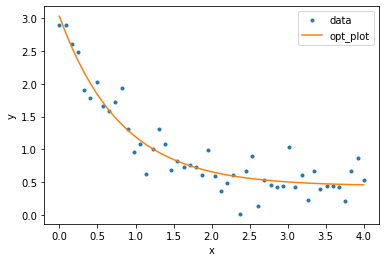

In [5]:
import scipy.optimize as opt

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, ".", label="Data")
popt, pcov = opt.curve_fit(func, xdata, ydata)

print (popt, pcov)

# Use the optimized parameters to plot the best fit
plt.plot(xdata, func(xdata, *popt), label="fit")

plt.xlabel("x")
plt.ylabel("y")
plt.legend(('data', 'opt_plot' ))
plt.show()


### Listing 7: R/W

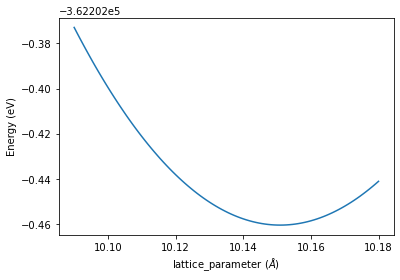

In [8]:
# Reading a file
file =open("lat.dat", "r")
data =[]
while True:
    line = file.readline()
    if line:
        data.append(list(map(float, line.split()[0:])))
    if not line:
        break
file.close()

# Writing a file
mod_file = open("modlat.dat", "w")
for i in range(len(data)):
    mod_file.write('%6.6f %6.6f \n' %(data[i][0], data[i][1]))
mod_file.close()

# Short-cut read
x, y = np.loadtxt('lat.dat', delimiter=None, unpack=True)

# Plot
plt.xlabel("lattice_parameter ($\AA$)")
plt.ylabel("Energy (eV)")
plt.plot(x,y)
plt.show()